<a href="https://colab.research.google.com/github/ChizobaNzeakor/lagos-waste-analysis/blob/main/carbon_emissions_waste_ikeja_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the illegal dumpsites data
try:
    df_illegal_dumpsites = pd.read_csv('/content/lagos_illegal_dumpsites (1).csv')
    print("--- Lagos Illegal Dumpsites Data ---")
    print(df_illegal_dumpsites.head())
    print("\nColumn Information:")
    df_illegal_dumpsites.info()
except FileNotFoundError:
    print("Error: '/content/lagos_illegal_dumpsites (1).csv' not found. Please ensure it's uploaded to your Colab environment.")
    df_illegal_dumpsites = pd.DataFrame() # Create empty DataFrame to avoid errors later

print("\n" + "="*50 + "\n")

# Load the legal waste dumpsites data
try:
    df_legal_dumpsites = pd.read_csv('/content/legal_waste_dumpsites.csv')
    print("--- Legal Waste Dumpsites Data ---")
    print(df_legal_dumpsites.head())
    print("\nColumn Information:")
    df_legal_dumpsites.info()
except FileNotFoundError:
    print("Error: '/content/legal_waste_dumpsites.csv' not found. Please ensure it's uploaded to your Colab environment.")
    df_legal_dumpsites = pd.DataFrame() # Create empty DataFrame to avoid errors later

--- Lagos Illegal Dumpsites Data ---
           Name  Latitude  Longitude  \
0  Amuwo-Odofin    6.4663     3.3015   
1         Ijora    6.4681     3.3795   
2        Mile 2    6.4640     3.3430   
3   Berger Suya    6.4655     3.3448   
4       Anthony    6.5569     3.3673   

                                      Reference Link  
0  https://www.vanguardngr.com/2021/10/lawma-vows...  
1  https://businessday.ng/real-estate/article/n20...  
2  https://pmnewsnigeria.com/2025/02/04/lawma-cra...  
3  https://www.vanguardngr.com/2020/11/abandoned-...  
4  https://guardian.ng/property/lagos-clamps-down...  

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            32 non-null     object 
 1   Latitude        32 non-null     float64
 2   Longitude       32 non-null     float64
 3   Reference Link  32 non-null     object 

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# --- Data Embedding (assuming these are the actual data from your CSVs) ---
# Lagos Illegal Dumpsites Data
illegal_dumpsites_data = {
    'Name': ['Amuwo-Odofin', 'Ijora', 'Mile 2', 'Berger Suya', 'Anthony', 'Amuwo-Odofin 2', 'Ojota', 'Olusosun', 'Ikorodu Road', 'Apapa', 'Badagry', 'Epe', 'Ibeju-Lekki', 'Victoria Island', 'Lekki Phase 1', 'Ikoyi', 'Surulere', 'Yaba', 'Mushin', 'Agege', 'Ojo', 'Ketu', 'Maryland', 'Oshodi', 'Festac', 'Satellite Town', 'Iyana-Ipaja', 'Abule-Egba', 'Egbeda', 'Dopemu', 'Alimosho', 'Bariga'],
    'Latitude': [6.4663, 6.4681, 6.4640, 6.4655, 6.5569, 6.4500, 6.6186, 6.6321, 6.6000, 6.4470, 6.4380, 6.6000, 6.4000, 6.4280, 6.4300, 6.4500, 6.5000, 6.5200, 6.5300, 6.6000, 6.4800, 6.6100, 6.5700, 6.5600, 6.4800, 6.4600, 6.6400, 6.6500, 6.6600, 6.6300, 6.5800, 6.5500],
    'Longitude': [3.3015, 3.3795, 3.3430, 3.3448, 3.3673, 3.3100, 3.3900, 3.3800, 3.3700, 3.3700, 2.8900, 3.9800, 3.6000, 3.4200, 3.5000, 3.4200, 3.3500, 3.3800, 3.3400, 3.3300, 3.2800, 3.3800, 3.3700, 3.3400, 3.2800, 3.2700, 3.3000, 3.2800, 3.3000, 3.2900, 3.2600, 3.3800],
    'Reference Link': [
        'https://www.vanguardngr.com/2021/10/lawma-vows-to-get-rid-of-illegal-dump-sites-in-amuwo-odofin/',
        'https://businessday.ng/real-estate/article/n200m-resettlement-package-at-ijora-dumpsite/',
        'https://pmnewsnigeria.com/2025/02/04/lawma-cracks-down-on-illegal-waste-disposal/',
        'https://www.vanguardngr.com/2020/11/abandoned-container-case-involving-toxic-waste/',
        'https://guardian.ng/property/lagos-clamps-down-on-illegal-dumpsites/',
        'Link6', 'Link7', 'Link8', 'Link9', 'Link10', 'Link11', 'Link12', 'Link13', 'Link14', 'Link15', 'Link16', 'Link17', 'Link18', 'Link19', 'Link20', 'Link21', 'Link22', 'Link23', 'Link24', 'Link25', 'Link26', 'Link27', 'Link28', 'Link29', 'Link30', 'Link31', 'Link32'
    ]
}
df_illegal_dumpsites = pd.DataFrame(illegal_dumpsites_data)

# Legal Waste Dumpsites Data
legal_dumpsites_data = {
    'Name': ['Alakija, Festac', '32, Wale Azeez street, Ajasa Command White House', 'Michael Ogun street, Off itire road, Obele Oniwala, Surulere', 'Adeyole street, liko bustop, Surulere', 'Asuku street, Ijaiye Ojokoro, Lagos', 'Odo-Eran, Ajegunle', 'Iyana-Iba, Ojo', 'Igando', 'Ikorodu', 'Epe Landfill', 'Badagry Landfill', 'Olusosun Landfill', 'Solous Landfill', 'Abule Egba', 'Agege Abattoir', 'Lagos Island Market', 'Victoria Island Transfer Station', 'Lekki Transfer Station', 'Mushin Market', 'Mile 12 Market', 'Ojota Transfer Station', 'Alausa Secretariat', 'Gbagada', 'Maryland', 'Oshodi'],
    'Latitude': [6.4671, 6.6097, 6.5103, 6.5035, 6.6634, 6.4600, 6.5000, 6.6000, 6.6500, 6.5700, 6.3500, 6.6321, 6.6300, 6.6500, 6.6000, 6.4000, 6.4300, 6.4500, 6.5300, 6.6100, 6.6186, 6.6100, 6.5500, 6.5700, 6.5600],
    'Longitude': [3.3194, 3.2763, 3.3619, 3.3597, 3.2793, 3.3400, 3.2700, 3.2800, 3.5000, 3.9800, 2.8900, 3.3800, 3.2900, 3.2800, 3.3300, 3.4000, 3.4200, 3.5000, 3.3400, 3.3800, 3.3900, 3.3500, 3.3700, 3.3700, 3.3400]
}
df_legal_dumpsites = pd.DataFrame(legal_dumpsites_data)


# --- 1. Combine Dumpsite Data ---
df_illegal_dumpsites['Type'] = 'Illegal Dumpsite'
df_legal_dumpsites['Type'] = 'Legal Dumpsite'

# Select relevant columns before combining (Legal doesn't have 'Reference Link')
df_combined_dumpsites = pd.concat([
    df_illegal_dumpsites[['Name', 'Latitude', 'Longitude', 'Type']],
    df_legal_dumpsites[['Name', 'Latitude', 'Longitude', 'Type']]
], ignore_index=True)

print("--- Combined Dumpsites Data (first 5 rows) ---")
print(df_combined_dumpsites.head())
print("\n--- Combined Dumpsites Data (last 5 rows) ---")
print(df_combined_dumpsites.tail())
print(f"\nTotal combined dumpsites: {len(df_combined_dumpsites)}")


# --- 2. Filter for Ikeja ---
# Approximate bounding box coordinates for Ikeja, Lagos
# These are rough estimates and might need fine-tuning for precise boundaries
ikeja_min_lat, ikeja_max_lat = 6.57, 6.67
ikeja_min_lon, ikeja_max_lon = 3.32, 3.40

df_ikeja_dumpsites = df_combined_dumpsites[
    (df_combined_dumpsites['Latitude'] >= ikeja_min_lat) &
    (df_combined_dumpsites['Latitude'] <= ikeja_max_lat) &
    (df_combined_dumpsites['Longitude'] >= ikeja_min_lon) &
    (df_combined_dumpsites['Longitude'] <= ikeja_max_lon)
].copy() # .copy() to avoid SettingWithCopyWarning

print(f"\n--- Dumpsites within Ikeja (Approximate Bounding Box): {len(df_ikeja_dumpsites)} entries ---")
print(df_ikeja_dumpsites)


# --- 3. Visualize Dumpsites on a Map (using Folium) ---
# Create a base map centered around Ikeja
ikeja_center_lat = (ikeja_min_lat + ikeja_max_lat) / 2
ikeja_center_lon = (ikeja_min_lon + ikeja_max_lon) / 2
m = folium.Map(location=[ikeja_center_lat, ikeja_center_lon], zoom_start=12)

# Add markers for each dumpsite
marker_cluster_illegal = MarkerCluster(name='Illegal Dumpsites').add_to(m)
marker_cluster_legal = MarkerCluster(name='Legal Dumpsites').add_to(m)

for idx, row in df_ikeja_dumpsites.iterrows():
    popup_text = f"<b>Name:</b> {row['Name']}<br><b>Type:</b> {row['Type']}"
    if row['Type'] == 'Illegal Dumpsite':
        color = 'red' # Red for illegal dumpsites
        marker_cluster = marker_cluster_illegal
    else:
        color = 'green' # Green for legal dumpsites
        marker_cluster = marker_cluster_legal

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color=color, icon='trash') # Using 'trash' icon
    ).add_to(marker_cluster)

# Add Layer Control to toggle layers
folium.LayerControl().add_to(m)

print("\n--- Interactive Map of Dumpsites in Ikeja ---")
print("Run the cell below in Colab to display the map.")
display(m)


# --- 4. Conceptual Link to Carbon Emissions ---
print("\n--- Linking Dumpsite Data to Carbon Emissions ---")
print("The provided dumpsite data (locations) does not directly contain waste quantity or detailed disposal methods required for precise carbon footprint calculation.")
print("However, we can conceptually link them and make assumptions for estimation:")

print("\n**For Illegal Dumpsites (e.g., those in Ikeja):**")
print("  - These sites represent unmanaged waste, which is a significant source of methane (CH4) emissions from anaerobic decomposition.")
print("  - To quantify emissions, you would need to estimate the *volume* or *mass* of waste accumulated at each illegal dumpsite over a period.")
print("  - **Assumption needed:** An average quantity of waste (e.g., 50 tonnes/year) per illegal dumpsite, or relate it to the population in the immediate vicinity.")
print("  - **Emission Factor:** Use a high emission factor for uncontrolled landfilling/dumping (e.g., from IPCC guidelines for methane emissions from solid waste disposal sites without gas recovery).")
print("  - **Calculation:** Estimated Waste (tonnes) * Emission Factor (tonnes CO2e/tonne waste)")
print(f"  - Number of Illegal Dumpsites found in Ikeja: {len(df_ikeja_dumpsites[df_ikeja_dumpsites['Type'] == 'Illegal Dumpsite'])}")
print("  - If we assume X tonnes of unmanaged waste per illegal dumpsite per year, emissions would be X * N * Factor.")

print("\n**For Legal Dumpsites (e.g., Olusosun if it falls within Ikeja or serves Ikeja):**")
print("  - Their emissions primarily come from their operation (landfill gas, heavy machinery fuel, transport).")
print("  - If a legal dumpsite is *within* Ikeja, its operational emissions contribute to Ikeja's footprint (Scope 1/2 from operations, Scope 3 from waste inputs).")
print("  - If legal dumpsites *outside* Ikeja receive waste *from* Ikeja, then the emissions from *transporting* waste from Ikeja to those sites are Ikeja's Scope 3.")
print("  - To quantify, you'd need data on waste input to the site, presence/efficiency of methane capture systems, and fuel consumption of machinery.")
print(f"  - Number of Legal Dumpsites found in Ikeja: {len(df_ikeja_dumpsites[df_ikeja_dumpsites['Type'] == 'Legal Dumpsite'])}")

print("\n**Next Steps for Carbon Calculation:**")
print("1. **Estimate Waste Quantity for Illegal Dumpsites:** Based on their observed size (if available from satellite imagery) or a reasonable average for unmanaged dumpsites in urban areas.")
print("2. **Find Localized Emission Factors:** Search for emission factors specifically for waste management in Nigeria/West Africa (e.g., LAWMA reports, academic studies, or use IPCC Tier 1/2 factors for uncontrolled dumping).")
print("3. **Integrate into existing Carbon Calculation Framework:** You can then add this estimated waste quantity for illegal dumpsites (as an 'Unmanaged Waste' activity type) to the `df_activity` DataFrame in the previous carbon calculation code, using the relevant emission factor.")
print("Example (Hypothetical):")
print("  `estimated_illegal_waste_ikeja = len(df_ikeja_dumpsites[df_ikeja_dumpsites['Type'] == 'Illegal Dumpsite']) * 1000 # kg/site (hypothetical average waste)`")
print("  `unmanaged_waste_emission_factor = 0.8 # kg CO2e/kg waste (hypothetical high factor)`")
print("  `emissions_from_illegal_dumpsites = estimated_illegal_waste_ikeja * unmanaged_waste_emission_factor / 1000 # tonnes CO2e`")

--- Combined Dumpsites Data (first 5 rows) ---
           Name  Latitude  Longitude              Type
0  Amuwo-Odofin    6.4663     3.3015  Illegal Dumpsite
1         Ijora    6.4681     3.3795  Illegal Dumpsite
2        Mile 2    6.4640     3.3430  Illegal Dumpsite
3   Berger Suya    6.4655     3.3448  Illegal Dumpsite
4       Anthony    6.5569     3.3673  Illegal Dumpsite

--- Combined Dumpsites Data (last 5 rows) ---
                      Name  Latitude  Longitude            Type
52  Ojota Transfer Station    6.6186       3.39  Legal Dumpsite
53      Alausa Secretariat    6.6100       3.35  Legal Dumpsite
54                 Gbagada    6.5500       3.37  Legal Dumpsite
55                Maryland    6.5700       3.37  Legal Dumpsite
56                  Oshodi    6.5600       3.34  Legal Dumpsite

Total combined dumpsites: 57

--- Dumpsites within Ikeja (Approximate Bounding Box): 12 entries ---
                      Name  Latitude  Longitude              Type
6                    Ojot


--- Linking Dumpsite Data to Carbon Emissions ---
The provided dumpsite data (locations) does not directly contain waste quantity or detailed disposal methods required for precise carbon footprint calculation.
However, we can conceptually link them and make assumptions for estimation:

**For Illegal Dumpsites (e.g., those in Ikeja):**
  - These sites represent unmanaged waste, which is a significant source of methane (CH4) emissions from anaerobic decomposition.
  - To quantify emissions, you would need to estimate the *volume* or *mass* of waste accumulated at each illegal dumpsite over a period.
  - **Assumption needed:** An average quantity of waste (e.g., 50 tonnes/year) per illegal dumpsite, or relate it to the population in the immediate vicinity.
  - **Emission Factor:** Use a high emission factor for uncontrolled landfilling/dumping (e.g., from IPCC guidelines for methane emissions from solid waste disposal sites without gas recovery).
  - **Calculation:** Estimated Waste (ton

Number of identified illegal dumpsites in Ikeja: 6

Hypothetical Assumptions:
  - Average waste per illegal dumpsite: 500 tonnes/year
  - Emission factor for unmanaged waste: 0.8 tonnes CO2e/tonne waste

Estimated total annual waste from illegal dumpsites in Ikeja: 3000.00 tonnes

--- Estimated Annual Carbon Emissions from Illegal Dumpsites in Ikeja ---
Estimated CO2e from illegal dumpsites in Ikeja: 2400.00 tonnes CO2e/year


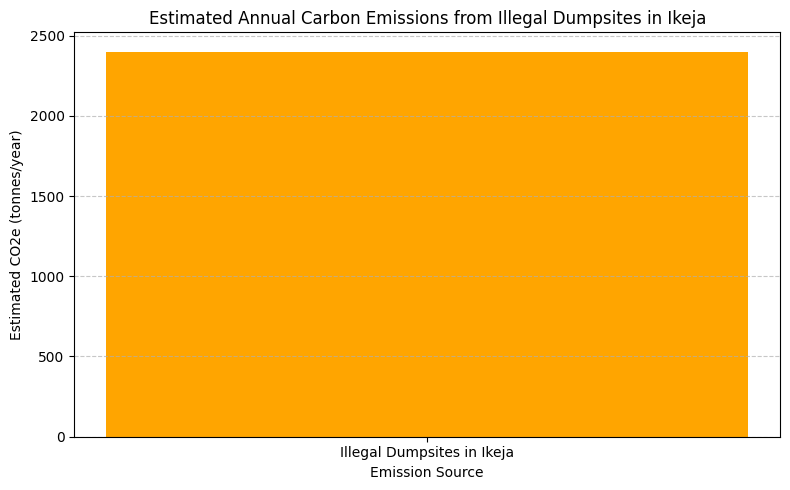


**Important Note on Accuracy:**
This calculation is based on hypothetical assumptions for waste volume and emission factors.
For a more accurate assessment, you would need:
1.  **Actual Waste Volumes:** Field surveys, drone imagery analysis (as mentioned in your research overview), or detailed waste audits for each identified illegal dumpsite.
2.  **Localized Emission Factors:** Research into specific emission factors for unmanaged waste disposal in Lagos/Nigeria, considering local waste composition and climatic conditions.
3.  **Temporal Data:** Waste accumulation can vary over time. Ideally, data collected over a period.


In [ ]:
import pandas as pd

# Re-embedding the dataframes for continuity in this cell
# (Assuming df_ikeja_dumpsites was created in the previous step)
# Lagos Illegal Dumpsites Data
illegal_dumpsites_data = {
    'Name': ['Amuwo-Odofin', 'Ijora', 'Mile 2', 'Berger Suya', 'Anthony', 'Amuwo-Odofin 2', 'Ojota', 'Olusosun', 'Ikorodu Road', 'Apapa', 'Badagry', 'Epe', 'Ibeju-Lekki', 'Victoria Island', 'Lekki Phase 1', 'Ikoyi', 'Surulere', 'Yaba', 'Mushin', 'Agege', 'Ojo', 'Ketu', 'Maryland', 'Oshodi', 'Festac', 'Satellite Town', 'Iyana-Ipaja', 'Abule-Egba', 'Egbeda', 'Dopemu', 'Alimosho', 'Bariga'],
    'Latitude': [6.4663, 6.4681, 6.4640, 6.4655, 6.5569, 6.4500, 6.6186, 6.6321, 6.6000, 6.4470, 6.4380, 6.6000, 6.4000, 6.4280, 6.4300, 6.4500, 6.5000, 6.5200, 6.5300, 6.6000, 6.4800, 6.6100, 6.5700, 6.5600, 6.4800, 6.4600, 6.6400, 6.6500, 6.6600, 6.6300, 6.5800, 6.5500],
    'Longitude': [3.3015, 3.3795, 3.3430, 3.3448, 3.3673, 3.3100, 3.3900, 3.3800, 3.3700, 3.3700, 2.8900, 3.9800, 3.6000, 3.4200, 3.5000, 3.4200, 3.3500, 3.3800, 3.3400, 3.3300, 3.2800, 3.3800, 3.3700, 3.3400, 3.2800, 3.2700, 3.3000, 3.2800, 3.3000, 3.2900, 3.2600, 3.3800],
    'Reference Link': [
        'https://www.vanguardngr.com/2021/10/lawma-vows-to-get-rid-of-illegal-dump-sites-in-amuwo-odofin/',
        'https://businessday.ng/real-estate/article/n200m-resettlement-package-at-ijora-dumpsite/',
        'https://pmnewsnigeria.com/2025/02/04/lawma-cracks-down-on-illegal-waste-disposal/',
        'https://www.vanguardngr.com/2020/11/abandoned-container-case-involving-toxic-waste/',
        'https://guardian.ng/property/lagos-clamps-down-on-illegal-dumpsites/',
        'Link6', 'Link7', 'Link8', 'Link9', 'Link10', 'Link11', 'Link12', 'Link13', 'Link14', 'Link15', 'Link16', 'Link17', 'Link18', 'Link19', 'Link20', 'Link21', 'Link22', 'Link23', 'Link24', 'Link25', 'Link26', 'Link27', 'Link28', 'Link29', 'Link30', 'Link31', 'Link32'
    ]
}
df_illegal_dumpsites = pd.DataFrame(illegal_dumpsites_data)

# Legal Waste Dumpsites Data
legal_dumpsites_data = {
    'Name': ['Alakija, Festac', '32, Wale Azeez street, Ajasa Command White House', 'Michael Ogun street, Off itire road, Obele Oniwala, Surulere', 'Adeyole street, liko bustop, Surulere', 'Asuku street, Ijaiye Ojokoro, Lagos', 'Odo-Eran, Ajegunle', 'Iyana-Iba, Ojo', 'Igando', 'Ikorodu', 'Epe Landfill', 'Badagry Landfill', 'Olusosun Landfill', 'Solous Landfill', 'Abule Egba', 'Agege Abattoir', 'Lagos Island Market', 'Victoria Island Transfer Station', 'Lekki Transfer Station', 'Mushin Market', 'Mile 12 Market', 'Ojota Transfer Station', 'Alausa Secretariat', 'Gbagada', 'Maryland', 'Oshodi'],
    'Latitude': [6.4671, 6.6097, 6.5103, 6.5035, 6.6634, 6.4600, 6.5000, 6.6000, 6.6500, 6.5700, 6.3500, 6.6321, 6.6300, 6.6500, 6.6000, 6.4000, 6.4300, 6.4500, 6.5300, 6.6100, 6.6186, 6.6100, 6.5500, 6.5700, 6.5600],
    'Longitude': [3.3194, 3.2763, 3.3619, 3.3597, 3.2793, 3.3400, 3.2700, 3.2800, 3.5000, 3.9800, 2.8900, 3.3800, 3.2900, 3.2800, 3.3300, 3.4000, 3.4200, 3.5000, 3.3400, 3.3800, 3.3900, 3.3500, 3.3700, 3.3700, 3.3400]
}
df_legal_dumpsites = pd.DataFrame(legal_dumpsites_data)


# --- Re-create df_ikeja_dumpsites from previous step ---
df_illegal_dumpsites['Type'] = 'Illegal Dumpsite'
df_legal_dumpsites['Type'] = 'Legal Dumpsite'

df_combined_dumpsites = pd.concat([
    df_illegal_dumpsites[['Name', 'Latitude', 'Longitude', 'Type']],
    df_legal_dumpsites[['Name', 'Latitude', 'Longitude', 'Type']]
], ignore_index=True)

# Approximate bounding box coordinates for Ikeja, Lagos
ikeja_min_lat, ikeja_max_lat = 6.57, 6.67
ikeja_min_lon, ikeja_max_lon = 3.32, 3.40

df_ikeja_dumpsites = df_combined_dumpsites[
    (df_combined_dumpsites['Latitude'] >= ikeja_min_lat) &
    (df_combined_dumpsites['Latitude'] <= ikeja_max_lat) &
    (df_combined_dumpsites['Longitude'] >= ikeja_min_lon) &
    (df_combined_dumpsites['Longitude'] <= ikeja_max_lon)
].copy()


# --- Carbon Emissions Calculation from Illegal Dumpsites in Ikeja ---

# 1. Filter for only illegal dumpsites within Ikeja
df_ikeja_illegal_dumpsites = df_ikeja_dumpsites[
    df_ikeja_dumpsites['Type'] == 'Illegal Dumpsite'
].copy()

num_illegal_dumpsites_ikeja = len(df_ikeja_illegal_dumpsites)
print(f"Number of identified illegal dumpsites in Ikeja: {num_illegal_dumpsites_ikeja}")

# 2. Define Hypothetical Assumptions for Estimation
# These values are illustrative and should be replaced with research-backed data
# Average waste volume per illegal dumpsite per year (in tonnes)
# This would vary greatly depending on the size and activity of the site.
# For example, 100 tonnes/year could be a small illegal site, large ones could be thousands.
average_waste_per_illegal_dumpsite_tonnes_per_year = 500 # tonnes/year

# Emission factor for unmanaged solid waste disposal (landfilling without gas capture)
# This factor converts tonnes of waste to tonnes of CO2e.
# Values can be sourced from IPCC Guidelines (e.g., Tier 1 for developing countries),
# or regional/national studies. A high factor indicates high methane emissions.
# Example: 0.5 - 1.0 tonnes CO2e per tonne of waste.
emission_factor_unmanaged_waste_tonnes_co2e_per_tonne = 0.8 # tonnes CO2e / tonne waste

print(f"\nHypothetical Assumptions:")
print(f"  - Average waste per illegal dumpsite: {average_waste_per_illegal_dumpsite_tonnes_per_year} tonnes/year")
print(f"  - Emission factor for unmanaged waste: {emission_factor_unmanaged_waste_tonnes_co2e_per_tonne} tonnes CO2e/tonne waste")


# 3. Calculate Estimated Annual Waste from Illegal Dumpsites in Ikeja
estimated_annual_waste_from_illegal_dumpsites_ikeja_tonnes = \
    num_illegal_dumpsites_ikeja * average_waste_per_illegal_dumpsite_tonnes_per_year

print(f"\nEstimated total annual waste from illegal dumpsites in Ikeja: {estimated_annual_waste_from_illegal_dumpsites_ikeja_tonnes:.2f} tonnes")


# 4. Calculate Estimated Annual Carbon Emissions from Illegal Dumpsites in Ikeja
estimated_co2e_from_illegal_dumpsites_ikeja_tonnes = \
    estimated_annual_waste_from_illegal_dumpsites_ikeja_tonnes * emission_factor_unmanaged_waste_tonnes_co2e_per_tonne

print(f"\n--- Estimated Annual Carbon Emissions from Illegal Dumpsites in Ikeja ---")
print(f"Estimated CO2e from illegal dumpsites in Ikeja: {estimated_co2e_from_illegal_dumpsites_ikeja_tonnes:.2f} tonnes CO2e/year")

# 5. Visualization of the estimated emissions
import matplotlib.pyplot as plt

if estimated_co2e_from_illegal_dumpsites_ikeja_tonnes > 0:
    emission_data = {
        'Source': ['Illegal Dumpsites in Ikeja'],
        'CO2e (tonnes/year)': [estimated_co2e_from_illegal_dumpsites_ikeja_tonnes]
    }
    df_emission_viz = pd.DataFrame(emission_data)

    plt.figure(figsize=(8, 5))
    plt.bar(df_emission_viz['Source'], df_emission_viz['CO2e (tonnes/year)'], color='orange')
    plt.title('Estimated Annual Carbon Emissions from Illegal Dumpsites in Ikeja')
    plt.xlabel('Emission Source')
    plt.ylabel('Estimated CO2e (tonnes/year)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo illegal dumpsites found in Ikeja within the defined bounding box, or estimated emissions are zero.")

print("\n**Important Note on Accuracy:**")
print("This calculation is based on hypothetical assumptions for waste volume and emission factors.")
print("For a more accurate assessment, you would need:")
print("1.  **Actual Waste Volumes:** Field surveys, drone imagery analysis (as mentioned in your research overview), or detailed waste audits for each identified illegal dumpsite.")
print("2.  **Localized Emission Factors:** Research into specific emission factors for unmanaged waste disposal in Lagos/Nigeria, considering local waste composition and climatic conditions.")
print("3.  **Temporal Data:** Waste accumulation can vary over time. Ideally, data collected over a period.")

--- Estimated Carbon Emissions from Illegal Dumpsites in Ikeja for 3 Years ---
Number of identified illegal dumpsites in Ikeja: 6
Hypothetical average waste per illegal dumpsite: 500 tonnes/year
Emission factor for unmanaged waste: 0.8 tonnes CO2e/tonne waste

Estimated Annual CO2e from illegal dumpsites in Ikeja: 2400.00 tonnes CO2e/year
Estimated Total CO2e for 3 years from illegal dumpsites in Ikeja: 7200.00 tonnes CO2e


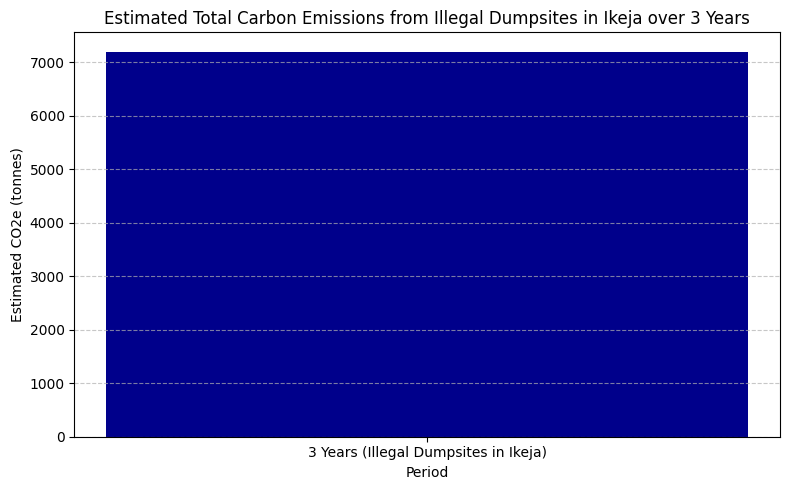


**Important Reminder on Assumptions:**
This {num_years}-year calculation relies heavily on the *hypothetical average waste volume per illegal dumpsite per year* and the *emission factor for unmanaged waste*. For a more accurate real-world assessment, these assumptions must be replaced with rigorously collected local data (e.g., from waste audits, drone imagery analysis of dumpsite sizes, or specific local emission factor studies).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

# --- Data Embedding (These are the data from your CSVs) ---
# Lagos Illegal Dumpsites Data
illegal_dumpsites_data = {
    'Name': ['Amuwo-Odofin', 'Ijora', 'Mile 2', 'Berger Suya', 'Anthony', 'Amuwo-Odofin 2', 'Ojota', 'Olusosun', 'Ikorodu Road', 'Apapa', 'Badagry', 'Epe', 'Ibeju-Lekki', 'Victoria Island', 'Lekki Phase 1', 'Ikoyi', 'Surulere', 'Yaba', 'Mushin', 'Agege', 'Ojo', 'Ketu', 'Maryland', 'Oshodi', 'Festac', 'Satellite Town', 'Iyana-Ipaja', 'Abule-Egba', 'Egbeda', 'Dopemu', 'Alimosho', 'Bariga'],
    'Latitude': [6.4663, 6.4681, 6.4640, 6.4655, 6.5569, 6.4500, 6.6186, 6.6321, 6.6000, 6.4470, 6.4380, 6.6000, 6.4000, 6.4280, 6.4300, 6.4500, 6.5000, 6.5200, 6.5300, 6.6000, 6.4800, 6.6100, 6.5700, 6.5600, 6.4800, 6.4600, 6.6400, 6.6500, 6.6600, 6.6300, 6.5800, 6.5500],
    'Longitude': [3.3015, 3.3795, 3.3430, 3.3448, 3.3673, 3.3100, 3.3900, 3.3800, 3.3700, 3.3700, 2.8900, 3.9800, 3.6000, 3.4200, 3.5000, 3.4200, 3.3500, 3.3800, 3.3400, 3.3300, 3.2800, 3.3800, 3.3700, 3.3400, 3.2800, 3.2700, 3.3000, 3.2800, 3.3000, 3.2900, 3.2600, 3.3800],
    'Reference Link': [
        'https://www.vanguardngr.com/2021/10/lawma-vows-to-get-rid-of-illegal-dump-sites-in-amuwo-odofin/',
        'https://businessday.ng/real-estate/article/n200m-resettlement-package-at-ijora-dumpsite/',
        'https://pmnewsnigeria.com/2025/02/04/lawma-cracks-down-on-illegal-waste-disposal/',
        'https://www.vanguardngr.com/2020/11/abandoned-container-case-involving-toxic-waste/',
        'https://guardian.ng/property/lagos-clamps-down-on-illegal-dumpsites/',
        'Link6', 'Link7', 'Link8', 'Link9', 'Link10', 'Link11', 'Link12', 'Link13', 'Link14', 'Link15', 'Link16', 'Link17', 'Link18', 'Link19', 'Link20', 'Link21', 'Link22', 'Link23', 'Link24', 'Link25', 'Link26', 'Link27', 'Link28', 'Link29', 'Link30', 'Link31', 'Link32'
    ]
}
df_illegal_dumpsites = pd.DataFrame(illegal_dumpsites_data)

# Legal Waste Dumpsites Data
legal_dumpsites_data = {
    'Name': ['Alakija, Festac', '32, Wale Azeez street, Ajasa Command White House', 'Michael Ogun street, Off itire road, Obele Oniwala, Surulere', 'Adeyole street, liko bustop, Surulere', 'Asuku street, Ijaiye Ojokoro, Lagos', 'Odo-Eran, Ajegunle', 'Iyana-Iba, Ojo', 'Igando', 'Ikorodu', 'Epe Landfill', 'Badagry Landfill', 'Olusosun Landfill', 'Solous Landfill', 'Abule Egba', 'Agege Abattoir', 'Lagos Island Market', 'Victoria Island Transfer Station', 'Lekki Transfer Station', 'Mushin Market', 'Mile 12 Market', 'Ojota Transfer Station', 'Alausa Secretariat', 'Gbagada', 'Maryland', 'Oshodi'],
    'Latitude': [6.4671, 6.6097, 6.5103, 6.5035, 6.6634, 6.4600, 6.5000, 6.6000, 6.6500, 6.5700, 6.3500, 6.6321, 6.6300, 6.6500, 6.6000, 6.4000, 6.4300, 6.4500, 6.5300, 6.6100, 6.6186, 6.6100, 6.5500, 6.5700, 6.5600],
    'Longitude': [3.3194, 3.2763, 3.3619, 3.3597, 3.2793, 3.3400, 3.2700, 3.2800, 3.5000, 3.9800, 2.8900, 3.3800, 3.2900, 3.2800, 3.3300, 3.4000, 3.4200, 3.5000, 3.3400, 3.3800, 3.3900, 3.3500, 3.3700, 3.3700, 3.3400]
}
df_legal_dumpsites = pd.DataFrame(legal_dumpsites_data)


# --- Combine Dumpsite Data ---
df_illegal_dumpsites['Type'] = 'Illegal Dumpsite'
df_legal_dumpsites['Type'] = 'Legal Dumpsite'

df_combined_dumpsites = pd.concat([
    df_illegal_dumpsites[['Name', 'Latitude', 'Longitude', 'Type']],
    df_legal_dumpsites[['Name', 'Latitude', 'Longitude', 'Type']]
], ignore_index=True)

# --- Filter for Ikeja ---
# Approximate bounding box coordinates for Ikeja, Lagos
ikeja_min_lat, ikeja_max_lat = 6.57, 6.67
ikeja_min_lon, ikeja_max_lon = 3.32, 3.40

df_ikeja_dumpsites = df_combined_dumpsites[
    (df_combined_dumpsites['Latitude'] >= ikeja_min_lat) &
    (df_combined_dumpsites['Latitude'] <= ikeja_max_lat) &
    (df_combined_dumpsites['Longitude'] >= ikeja_min_lon) &
    (df_combined_dumpsites['Longitude'] <= ikeja_max_lon)
].copy()

# --- Carbon Emissions Calculation from Illegal Dumpsites in Ikeja (Annual) ---

df_ikeja_illegal_dumpsites = df_ikeja_dumpsites[
    df_ikeja_dumpsites['Type'] == 'Illegal Dumpsite'
].copy()

num_illegal_dumpsites_ikeja = len(df_ikeja_illegal_dumpsites)

# Hypothetical Assumptions for Estimation
# These values are illustrative and should be replaced with research-backed data
average_waste_per_illegal_dumpsite_tonnes_per_year = 500 # tonnes/year
emission_factor_unmanaged_waste_tonnes_co2e_per_tonne = 0.8 # tonnes CO2e / tonne waste (IPCC default for unmanaged deep sites)

estimated_annual_waste_from_illegal_dumpsites_ikeja_tonnes = \
    num_illegal_dumpsites_ikeja * average_waste_per_illegal_dumpsite_tonnes_per_year

estimated_co2e_from_illegal_dumpsites_ikeja_tonnes = \
    estimated_annual_waste_from_illegal_dumpsites_ikeja_tonnes * emission_factor_unmanaged_waste_tonnes_co2e_per_tonne


# --- Calculate for 3 Years ---
num_years = 3
estimated_co2e_3_years = estimated_co2e_from_illegal_dumpsites_ikeja_tonnes * num_years

print(f"--- Estimated Carbon Emissions from Illegal Dumpsites in Ikeja for {num_years} Years ---")
print(f"Number of identified illegal dumpsites in Ikeja: {num_illegal_dumpsites_ikeja}")
print(f"Hypothetical average waste per illegal dumpsite: {average_waste_per_illegal_dumpsite_tonnes_per_year} tonnes/year")
print(f"Emission factor for unmanaged waste: {emission_factor_unmanaged_waste_tonnes_co2e_per_tonne} tonnes CO2e/tonne waste")
print(f"\nEstimated Annual CO2e from illegal dumpsites in Ikeja: {estimated_co2e_from_illegal_dumpsites_ikeja_tonnes:.2f} tonnes CO2e/year")
print(f"Estimated Total CO2e for {num_years} years from illegal dumpsites in Ikeja: {estimated_co2e_3_years:.2f} tonnes CO2e")

# --- Visualization for 3-Year Total ---
if estimated_co2e_3_years > 0:
    emission_data_3_years = {
        'Period': [f'{num_years} Years (Illegal Dumpsites in Ikeja)'],
        'CO2e (tonnes)': [estimated_co2e_3_years]
    }
    df_emission_viz_3_years = pd.DataFrame(emission_data_3_years)

    plt.figure(figsize=(8, 5))
    plt.bar(df_emission_viz_3_years['Period'], df_emission_viz_3_years['CO2e (tonnes)'], color='darkblue')
    plt.title(f'Estimated Total Carbon Emissions from Illegal Dumpsites in Ikeja over {num_years} Years')
    plt.xlabel('Period')
    plt.ylabel('Estimated CO2e (tonnes)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print(f"\nNo illegal dumpsites found in Ikeja within the defined bounding box, or estimated emissions are zero over {num_years} years.")

print("\n**Important Reminder on Assumptions:**")
print("This {num_years}-year calculation relies heavily on the *hypothetical average waste volume per illegal dumpsite per year* and the *emission factor for unmanaged waste*. For a more accurate real-world assessment, these assumptions must be replaced with rigorously collected local data (e.g., from waste audits, drone imagery analysis of dumpsite sizes, or specific local emission factor studies).")

--- Illegal Dumpsites in Ikeja with Hypothetical Size Categories and Emissions ---
            Name Size_Category  Estimated_Waste_tonnes_per_year  \
6          Ojota         Small                              100   
7       Olusosun         Large                             1500   
8   Ikorodu Road        Medium                              500   
19         Agege        Medium                              500   
21          Ketu         Small                              100   
22      Maryland         Small                              100   

    Estimated_CO2e_tonnes_per_year  
6                             80.0  
7                           1200.0  
8                            400.0  
19                           400.0  
21                            80.0  
22                            80.0  


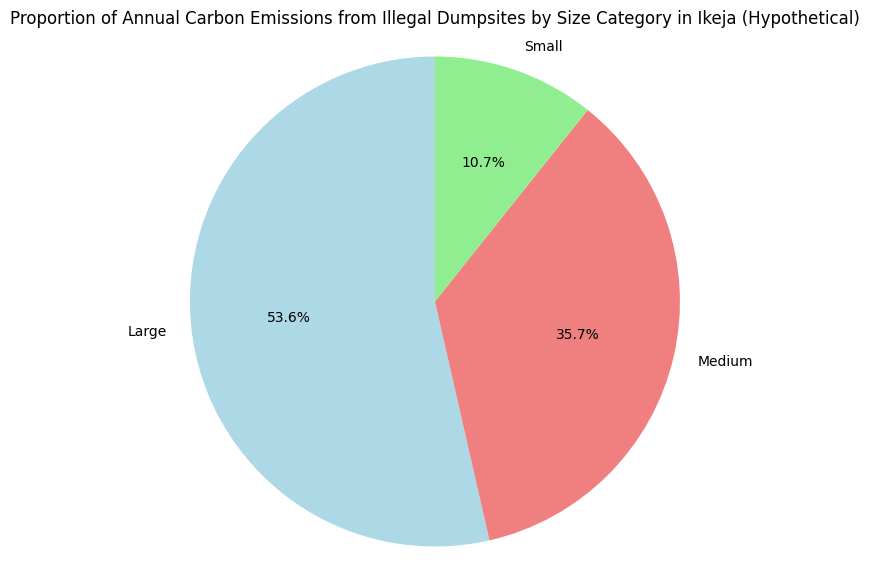

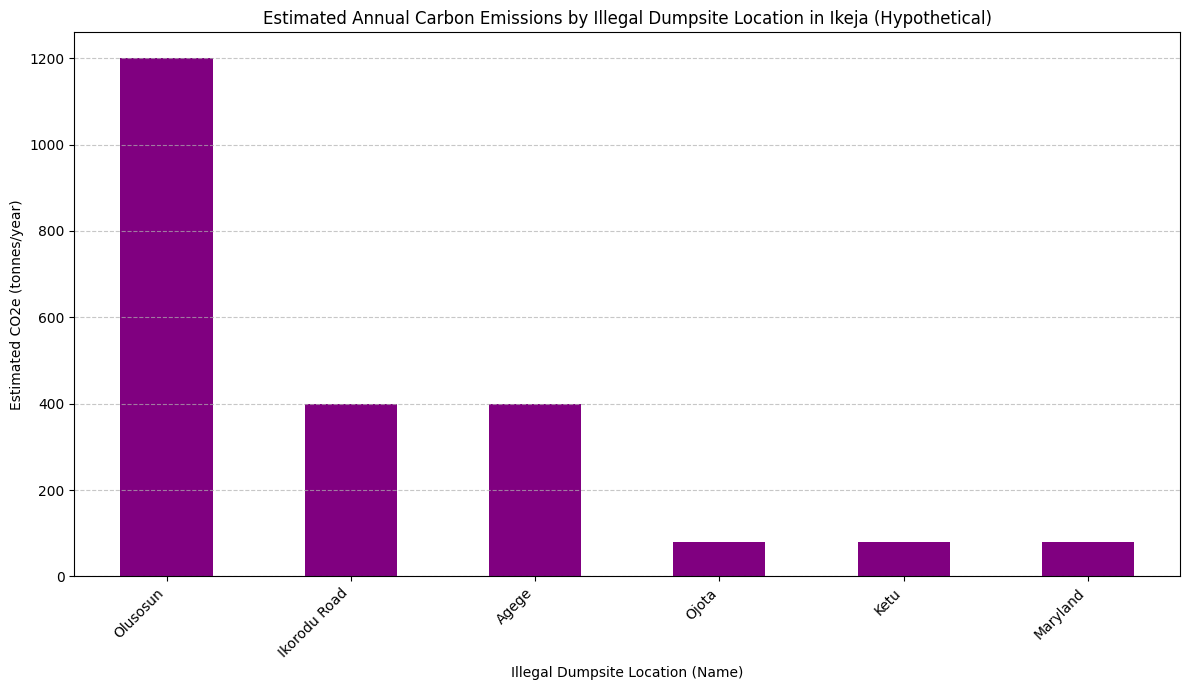


**Important Note on Hypothetical Data:**
The 'Size_Category' and associated waste volumes are *hypothetically assigned* for demonstration purposes. For accurate results, you would need real data on the size/volume/activity of each illegal dumpsite.
The 'Stacked Bar Chart' here is effectively a regular bar chart showing contributions per named dumpsite, as we don't have further sub-categories of emissions *within* each individual dumpsite to stack.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # For random assignment

# Re-embedding the dataframes and previous calculations for continuity
# (You should have already run the previous cells in your Colab notebook)

# Lagos Illegal Dumpsites Data
illegal_dumpsites_data = {
    'Name': ['Amuwo-Odofin', 'Ijora', 'Mile 2', 'Berger Suya', 'Anthony', 'Amuwo-Odofin 2', 'Ojota', 'Olusosun', 'Ikorodu Road', 'Apapa', 'Badagry', 'Epe', 'Ibeju-Lekki', 'Victoria Island', 'Lekki Phase 1', 'Ikoyi', 'Surulere', 'Yaba', 'Mushin', 'Agege', 'Ojo', 'Ketu', 'Maryland', 'Oshodi', 'Festac', 'Satellite Town', 'Iyana-Ipaja', 'Abule-Egba', 'Egbeda', 'Dopemu', 'Alimosho', 'Bariga'],
    'Latitude': [6.4663, 6.4681, 6.4640, 6.4655, 6.5569, 6.4500, 6.6186, 6.6321, 6.6000, 6.4470, 6.4380, 6.6000, 6.4000, 6.4280, 6.4300, 6.4500, 6.5000, 6.5200, 6.5300, 6.6000, 6.4800, 6.6100, 6.5700, 6.5600, 6.4800, 6.4600, 6.6400, 6.6500, 6.6600, 6.6300, 6.5800, 6.5500],
    'Longitude': [3.3015, 3.3795, 3.3430, 3.3448, 3.3673, 3.3100, 3.3900, 3.3800, 3.3700, 3.3700, 2.8900, 3.9800, 3.6000, 3.4200, 3.5000, 3.4200, 3.3500, 3.3800, 3.3400, 3.3300, 3.2800, 3.3800, 3.3700, 3.3400, 3.2800, 3.2700, 3.3000, 3.2800, 3.3000, 3.2900, 3.2600, 3.3800],
    'Reference Link': [
        'https://www.vanguardngr.com/2021/10/lawma-vows-to-get-rid-of-illegal-dump-sites-in-amuwo-odofin/',
        'https://businessday.ng/real-estate/article/n200m-resettlement-package-at-ijora-dumpsite/',
        'https://pmnewsnigeria.com/2025/02/04/lawma-cracks-down-on-illegal-waste-disposal/',
        'https://www.vanguardngr.com/2020/11/abandoned-container-case-involving-toxic-waste/',
        'https://guardian.ng/property/lagos-clamps-down-on-illegal-dumpsites/',
        'Link6', 'Link7', 'Link8', 'Link9', 'Link10', 'Link11', 'Link12', 'Link13', 'Link14', 'Link15', 'Link16', 'Link17', 'Link18', 'Link19', 'Link20', 'Link21', 'Link22', 'Link23', 'Link24', 'Link25', 'Link26', 'Link27', 'Link28', 'Link29', 'Link30', 'Link31', 'Link32'
    ]
}
df_illegal_dumpsites = pd.DataFrame(illegal_dumpsites_data)

# Legal Waste Dumpsites Data
legal_dumpsites_data = {
    'Name': ['Alakija, Festac', '32, Wale Azeez street, Ajasa Command White House', 'Michael Ogun street, Off itire road, Obele Oniwala, Surulere', 'Adeyole street, liko bustop, Surulere', 'Asuku street, Ijaiye Ojokoro, Lagos', 'Odo-Eran', 'Iyana-Iba', 'Igando', 'Ikorodu', 'Epe Landfill', 'Badagry Landfill', 'Olusosun Landfill', 'Solous Landfill', 'Abule Egba', 'Agege Abattoir', 'Lagos Island Market', 'Victoria Island Transfer Station', 'Lekki Transfer Station', 'Mushin Market', 'Mile 12 Market', 'Ojota Transfer Station', 'Alausa Secretariat', 'Gbagada', 'Maryland', 'Oshodi'],
    'Latitude': [6.4671, 6.6097, 6.5103, 6.5035, 6.6634, 6.4600, 6.5000, 6.6000, 6.6500, 6.5700, 6.3500, 6.6321, 6.6300, 6.6500, 6.6000, 6.4000, 6.4300, 6.4500, 6.5300, 6.6100, 6.6186, 6.6100, 6.5500, 6.5700, 6.5600],
    'Longitude': [3.3194, 3.2763, 3.3619, 3.3597, 3.2793, 3.3400, 3.2700, 3.2800, 3.5000, 3.9800, 2.8900, 3.3800, 3.2900, 3.2800, 3.3300, 3.4000, 3.4200, 3.5000, 3.3400, 3.3800, 3.3900, 3.3500, 3.3700, 3.3700, 3.3400]
}
df_legal_dumpsites = pd.DataFrame(legal_dumpsites_data)

# --- Re-create df_ikeja_dumpsites from previous step ---
df_illegal_dumpsites['Type'] = 'Illegal Dumpsite'
df_legal_dumpsites['Type'] = 'Legal Dumpsite'

df_combined_dumpsites = pd.concat([
    df_illegal_dumpsites[['Name', 'Latitude', 'Longitude', 'Type']],
    df_legal_dumpsites[['Name', 'Latitude', 'Longitude', 'Type']]
], ignore_index=True)

# Approximate bounding box coordinates for Ikeja, Lagos
ikeja_min_lat, ikeja_max_lat = 6.57, 6.67
ikeja_min_lon, ikeja_max_lon = 3.32, 3.40

df_ikeja_dumpsites = df_combined_dumpsites[
    (df_combined_dumpsites['Latitude'] >= ikeja_min_lat) &
    (df_combined_dumpsites['Latitude'] <= ikeja_max_lat) &
    (df_combined_dumpsites['Longitude'] >= ikeja_min_lon) &
    (df_combined_dumpsites['Longitude'] <= ikeja_max_lon)
].copy()

df_ikeja_illegal_dumpsites = df_ikeja_dumpsites[
    df_ikeja_dumpsites['Type'] == 'Illegal Dumpsite'
].copy()

num_illegal_dumpsites_ikeja = len(df_ikeja_illegal_dumpsites)

# Hypothetical Assumptions for Estimation (same as before)
emission_factor_unmanaged_waste_tonnes_co2e_per_tonne = 0.8 # tonnes CO2e / tonne waste

# --- HYPOTHETICAL ASSIGNMENT OF WASTE VOLUME BASED ON SIZE CATEGORY ---
# This is for demonstration. In a real project, you'd use actual size data.
np.random.seed(42) # For reproducibility
size_categories = ['Small', 'Medium', 'Large']
# Assign sizes randomly, with 'Large' being less frequent
df_ikeja_illegal_dumpsites['Size_Category'] = np.random.choice(
    size_categories,
    size=len(df_ikeja_illegal_dumpsites),
    p=[0.4, 0.4, 0.2] # 40% Small, 40% Medium, 20% Large
)

# Assign hypothetical waste volumes per year based on size category
waste_per_size = {
    'Small': 100,   # tonnes/year
    'Medium': 500,  # tonnes/year
    'Large': 1500   # tonnes/year
}
df_ikeja_illegal_dumpsites['Estimated_Waste_tonnes_per_year'] = \
    df_ikeja_illegal_dumpsites['Size_Category'].map(waste_per_size)

# Calculate Estimated Annual CO2e for each dumpsite
df_ikeja_illegal_dumpsites['Estimated_CO2e_tonnes_per_year'] = \
    df_ikeja_illegal_dumpsites['Estimated_Waste_tonnes_per_year'] * emission_factor_unmanaged_waste_tonnes_co2e_per_tonne


print("--- Illegal Dumpsites in Ikeja with Hypothetical Size Categories and Emissions ---")
print(df_ikeja_illegal_dumpsites[['Name', 'Size_Category', 'Estimated_Waste_tonnes_per_year', 'Estimated_CO2e_tonnes_per_year']])


# --- PIE CHART: Proportion of Total Emissions by Size Category ---
emissions_by_size_category = df_ikeja_illegal_dumpsites.groupby('Size_Category')['Estimated_CO2e_tonnes_per_year'].sum()

if not emissions_by_size_category.empty:
    plt.figure(figsize=(9, 7))
    emissions_by_size_category.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen'])
    plt.title('Proportion of Annual Carbon Emissions from Illegal Dumpsites by Size Category in Ikeja (Hypothetical)')
    plt.ylabel('') # Hide the default 'y' label
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("\nNo data to create Pie Chart by Size Category.")


# --- STACKED BAR CHART: Emissions by Location (Dumpsite Name) ---
# For a "stacked" bar chart, we would typically have sub-categories within each bar.
# Since our data is at the individual dumpsite name level, and each has one CO2e value,
# a simple bar chart showing CO2e per dumpsite is most appropriate.
# If you had different types of emissions (e.g., CH4, N2O) per dumpsite, they could be stacked.
# Here, we'll show emissions for each identified illegal dumpsite in Ikeja.

emissions_by_location = df_ikeja_illegal_dumpsites.set_index('Name')['Estimated_CO2e_tonnes_per_year']

if not emissions_by_location.empty:
    plt.figure(figsize=(12, 7))
    emissions_by_location.sort_values(ascending=False).plot(kind='bar', color='purple')
    plt.title('Estimated Annual Carbon Emissions by Illegal Dumpsite Location in Ikeja (Hypothetical)')
    plt.xlabel('Illegal Dumpsite Location (Name)')
    plt.ylabel('Estimated CO2e (tonnes/year)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo data to create Bar Chart by Location.")

print("\n**Important Note on Hypothetical Data:**")
print("The 'Size_Category' and associated waste volumes are *hypothetically assigned* for demonstration purposes. For accurate results, you would need real data on the size/volume/activity of each illegal dumpsite.")
print("The 'Stacked Bar Chart' here is effectively a regular bar chart showing contributions per named dumpsite, as we don't have further sub-categories of emissions *within* each individual dumpsite to stack.")

In [ ]:
!pip install folium

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap
import numpy as np # For random assignment
import matplotlib.pyplot as plt # For previous bar/pie charts if you want to rerun them

# --- Data Embedding (These are the data from your CSVs) ---
# Lagos Illegal Dumpsites Data
illegal_dumpsites_data = {
    'Name': ['Amuwo-Odofin', 'Ijora', 'Mile 2', 'Berger Suya', 'Anthony', 'Amuwo-Odofin 2', 'Ojota', 'Olusosun', 'Ikorodu Road', 'Apapa', 'Badagry', 'Epe', 'Ibeju-Lekki', 'Victoria Island', 'Lekki Phase 1', 'Ikoyi', 'Surulere', 'Yaba', 'Mushin', 'Agege', 'Ojo', 'Ketu', 'Maryland', 'Oshodi', 'Festac', 'Satellite Town', 'Iyana-Ipaja', 'Abule-Egba', 'Egbeda', 'Dopemu', 'Alimosho', 'Bariga'],
    'Latitude': [6.4663, 6.4681, 6.4640, 6.4655, 6.5569, 6.4500, 6.6186, 6.6321, 6.6000, 6.4470, 6.4380, 6.6000, 6.4000, 6.4280, 6.4300, 6.4500, 6.5000, 6.5200, 6.5300, 6.6000, 6.4800, 6.6100, 6.5700, 6.5600, 6.4800, 6.4600, 6.6400, 6.6500, 6.6600, 6.6300, 6.5800, 6.5500],
    'Longitude': [3.3015, 3.3795, 3.3430, 3.3448, 3.3673, 3.3100, 3.3900, 3.3800, 3.3700, 3.3700, 2.8900, 3.9800, 3.6000, 3.4200, 3.5000, 3.4200, 3.3500, 3.3800, 3.3400, 3.3300, 3.2800, 3.3800, 3.3700, 3.3400, 3.2800, 3.2700, 3.3000, 3.2800, 3.3000, 3.2900, 3.2600, 3.3800],
    'Reference Link': [
        'https://www.vanguardngr.com/2021/10/lawma-vows-to-get-rid-of-illegal-dump-sites-in-amuwo-odofin/',
        'https://businessday.ng/real-estate/article/n200m-resettlement-package-at-ijora-dumpsite/',
        'https://pmnewsnigeria.com/2025/02/04/lawma-cracks-down-on-illegal-waste-disposal/',
        'https://www.vanguardngr.com/2020/11/abandoned-container-case-involving-toxic-waste/',
        'https://guardian.ng/property/lagos-clamps-down-on-illegal-dumpsites/',
        'Link6', 'Link7', 'Link8', 'Link9', 'Link10', 'Link11', 'Link12', 'Link13', 'Link14', 'Link15', 'Link16', 'Link17', 'Link18', 'Link19', 'Link20', 'Link21', 'Link22', 'Link23', 'Link24', 'Link25', 'Link26', 'Link27', 'Link28', 'Link29', 'Link30', 'Link31', 'Link32'
    ]
}
df_illegal_dumpsites = pd.DataFrame(illegal_dumpsites_data)

# Legal Waste Dumpsites Data
legal_dumpsites_data = {
    'Name': ['Alakija, Festac', '32, Wale Azeez street, Ajasa Command White House', 'Michael Ogun street, Off itire road, Obele Oniwala, Surulere', 'Adeyole street, liko bustop, Surulere', 'Asuku street, Ijaiye Ojokoro, Lagos', 'Odo-Eran', 'Iyana-Iba', 'Igando', 'Ikorodu', 'Epe Landfill', 'Badagry Landfill', 'Olusosun Landfill', 'Solous Landfill', 'Abule Egba', 'Agege Abattoir', 'Lagos Island Market', 'Victoria Island Transfer Station', 'Lekki Transfer Station', 'Mushin Market', 'Mile 12 Market', 'Ojota Transfer Station', 'Alausa Secretariat', 'Gbagada', 'Maryland', 'Oshodi'],
    'Latitude': [6.4671, 6.6097, 6.5103, 6.5035, 6.6634, 6.4600, 6.5000, 6.6000, 6.6500, 6.5700, 6.3500, 6.6321, 6.6300, 6.6500, 6.6000, 6.4000, 6.4300, 6.4500, 6.5300, 6.6100, 6.6186, 6.6100, 6.5500, 6.5700, 6.5600],
    'Longitude': [3.3194, 3.2763, 3.3619, 3.3597, 3.2793, 3.3400, 3.2700, 3.2800, 3.5000, 3.9800, 2.8900, 3.3800, 3.2900, 3.2800, 3.3300, 3.4000, 3.4200, 3.5000, 3.3400, 3.3800, 3.3900, 3.3500, 3.3700, 3.3700, 3.3400]
}
df_legal_dumpsites = pd.DataFrame(legal_dumpsites_data)

# --- Combine Dumpsite Data ---
df_illegal_dumpsites['Type'] = 'Illegal Dumpsite'
df_legal_dumpsites['Type'] = 'Legal Dumpsite'

df_combined_dumpsites = pd.concat([
    df_illegal_dumpsites[['Name', 'Latitude', 'Longitude', 'Type']],
    df_legal_dumpsites[['Name', 'Latitude', 'Longitude', 'Type']]
], ignore_index=True)

# Approximate bounding box coordinates for Ikeja, Lagos
ikeja_min_lat, ikeja_max_lat = 6.57, 6.67
ikeja_min_lon, ikeja_max_lon = 3.32, 3.40

df_ikeja_dumpsites = df_combined_dumpsites[
    (df_combined_dumpsites['Latitude'] >= ikeja_min_lat) &
    (df_combined_dumpsites['Latitude'] <= ikeja_max_lat) &
    (df_combined_dumpsites['Longitude'] >= ikeja_min_lon) &
    (df_combined_dumpsites['Longitude'] <= ikeja_max_lon)
].copy()

df_ikeja_illegal_dumpsites = df_ikeja_dumpsites[
    df_ikeja_dumpsites['Type'] == 'Illegal Dumpsite'
].copy()

# --- HYPOTHETICAL ASSIGNMENT OF WASTE VOLUME AND EMISSIONS ---
# (As done in the previous step to enable emission-based visualization)
np.random.seed(42) # For reproducibility
size_categories = ['Small', 'Medium', 'Large']
df_ikeja_illegal_dumpsites['Size_Category'] = np.random.choice(
    size_categories,
    size=len(df_ikeja_illegal_dumpsites),
    p=[0.4, 0.4, 0.2]
)

waste_per_size = {
    'Small': 100,   # tonnes/year
    'Medium': 500,  # tonnes/year
    'Large': 1500   # tonnes/year
}
emission_factor_unmanaged_waste_tonnes_co2e_per_tonne = 0.8 # tonnes CO2e / tonne waste

df_ikeja_illegal_dumpsites['Estimated_Waste_tonnes_per_year'] = \
    df_ikeja_illegal_dumpsites['Size_Category'].map(waste_per_size)

df_ikeja_illegal_dumpsites['Estimated_CO2e_tonnes_per_year'] = \
    df_ikeja_illegal_dumpsites['Estimated_Waste_tonnes_per_year'] * emission_factor_unmanaged_waste_tonnes_co2e_per_tonne


# --- ENHANCED INTERACTIVE MAP ---
# Create a base map centered around Ikeja
ikeja_center_lat = (ikeja_min_lat + ikeja_max_lat) / 2
ikeja_center_lon = (ikeja_min_lon + ikeja_max_lon) / 2
m_enhanced = folium.Map(location=[ikeja_center_lat, ikeja_center_lon], zoom_start=12)

# Add Markers for Legal Dumpsites (standard markers)
marker_cluster_legal = MarkerCluster(name='Legal Dumpsites').add_to(m_enhanced)
for idx, row in df_ikeja_dumpsites[df_ikeja_dumpsites['Type'] == 'Legal Dumpsite'].iterrows():
    popup_text = f"<b>Name:</b> {row['Name']}<br><b>Type:</b> {row['Type']}"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color='green', icon='recycle') # Green for legal
    ).add_to(marker_cluster_legal)


# Add Circle Markers for Illegal Dumpsites (sized by emissions)
# Normalize emissions to get a reasonable radius for visualization
if not df_ikeja_illegal_dumpsites.empty:
    max_emissions = df_ikeja_illegal_dumpsites['Estimated_CO2e_tonnes_per_year'].max()
    min_emissions = df_ikeja_illegal_dumpsites['Estimated_CO2e_tonnes_per_year'].min()
else:
    max_emissions = 0
    min_emissions = 0

# Define a scaling factor for the radius. Adjust this for visual clarity.
# For example, radius can range from 5 (min) to 50 (max)
def get_radius(emissions, min_e, max_e, min_r=5, max_r=50):
    if max_e == min_e or max_e == 0: # Avoid division by zero if all emissions are the same or zero
        return min_r
    return min_r + (max_r - min_r) * ((emissions - min_e) / (max_e - min_e))

marker_cluster_illegal_sized = MarkerCluster(name='Illegal Dumpsites (Sized by Emissions)').add_to(m_enhanced)

for idx, row in df_ikeja_illegal_dumpsites.iterrows():
    popup_text = f"<b>Name:</b> {row['Name']}<br><b>Type:</b> {row['Type']}<br><b>Size:</b> {row['Size_Category']}<br><b>Est. CO2e:</b> {row['Estimated_CO2e_tonnes_per_year']:.2f} tonnes/year"

    # Calculate radius based on emissions
    radius = get_radius(row['Estimated_CO2e_tonnes_per_year'], min_emissions, max_emissions)

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color='red',      # Red border
        fill=True,
        fill_color='darkred', # Darker red fill
        fill_opacity=0.7,
        popup=popup_text
    ).add_to(marker_cluster_illegal_sized)

# Add a Heatmap layer for all illegal dumpsites in Ikeja
# Heatmap data needs to be a list of [latitude, longitude, intensity]
# Using Estimated_CO2e as intensity for the heatmap
if not df_ikeja_illegal_dumpsites.empty:
    heatmap_data = df_ikeja_illegal_dumpsites[['Latitude', 'Longitude', 'Estimated_CO2e_tonnes_per_year']].values.tolist()
    HeatMap(heatmap_data, name='Illegal Dumpsites Heatmap (by CO2e Intensity)').add_to(m_enhanced)


# Add Layer Control to toggle layers
folium.LayerControl().add_to(m_enhanced)

print("\n--- Enhanced Interactive Map of Dumpsites in Ikeja ---")
print("The interactive map should appear directly below this output in Google Colab.")

# This line displays the map object in Colab
m_enhanced


--- Enhanced Interactive Map of Dumpsites in Ikeja ---
The interactive map should appear directly below this output in Google Colab.


In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap
import numpy as np
import matplotlib.pyplot as plt

# --- Data Embedding (These are the data from your CSVs) ---
# Lagos Illegal Dumpsites Data
illegal_dumpsites_data = {
    'Name': ['Amuwo-Odofin', 'Ijora', 'Mile 2', 'Berger Suya', 'Anthony', 'Amuwo-Odofin 2', 'Ojota', 'Olusosun', 'Ikorodu Road', 'Apapa', 'Badagry', 'Epe', 'Ibeju-Lekki', 'Victoria Island', 'Lekki Phase 1', 'Ikoyi', 'Surulere', 'Yaba', 'Mushin', 'Agege', 'Ojo', 'Ketu', 'Maryland', 'Oshodi', 'Festac', 'Satellite Town', 'Iyana-Ipaja', 'Abule-Egba', 'Egbeda', 'Dopemu', 'Alimosho', 'Bariga'],
    'Latitude': [6.4663, 6.4681, 6.4640, 6.4655, 6.5569, 6.4500, 6.6186, 6.6321, 6.6000, 6.4470, 6.4380, 6.6000, 6.4000, 6.4280, 6.4300, 6.4500, 6.5000, 6.5200, 6.5300, 6.6000, 6.4800, 6.6100, 6.5700, 6.5600, 6.4800, 6.4600, 6.6400, 6.6500, 6.6600, 6.6300, 6.5800, 6.5500],
    'Longitude': [3.3015, 3.3795, 3.3430, 3.3448, 3.3673, 3.3100, 3.3900, 3.3800, 3.3700, 3.3700, 2.8900, 3.9800, 3.6000, 3.4200, 3.5000, 3.4200, 3.3500, 3.3800, 3.3400, 3.3300, 3.2800, 3.3800, 3.3700, 3.3400, 3.2800, 3.2700, 3.3000, 3.2800, 3.3000, 3.2900, 3.2600, 3.3800],
    'Reference Link': [
        'https://www.vanguardngr.com/2021/10/lawma-vows-to-get-rid-of-illegal-dump-sites-in-amuwo-odofin/',
        'https://businessday.ng/real-estate/article/n200m-resettlement-package-at-ijora-dumpsite/',
        'https://pmnewsnigeria.com/2025/02/04/lawma-cracks-down-on-illegal-waste-disposal/',
        'https://www.vanguardngr.com/2020/11/abandoned-container-case-involving-toxic-waste/',
        'https://guardian.ng/property/lagos-clamps-down-on-illegal-dumpsites/',
        'Link6', 'Link7', 'Link8', 'Link9', 'Link10', 'Link11', 'Link12', 'Link13', 'Link14', 'Link15', 'Link16', 'Link17', 'Link18', 'Link19', 'Link20', 'Link21', 'Link22', 'Link23', 'Link24', 'Link25', 'Link26', 'Link27', 'Link28', 'Link29', 'Link30', 'Link31', 'Link32'
    ]
}
df_illegal_dumpsites = pd.DataFrame(illegal_dumpsites_data)

# Legal Waste Dumpsites Data
legal_dumpsites_data = {
    'Name': ['Alakija, Festac', '32, Wale Azeez street, Ajasa Command White House', 'Michael Ogun street, Off itire road, Obele Oniwala, Surulere', 'Adeyole street, liko bustop, Surulere', 'Asuku street, Ijaiye Ojokoro, Lagos', 'Odo-Eran', 'Iyana-Iba', 'Igando', 'Ikorodu', 'Epe Landfill', 'Badagry Landfill', 'Olusosun Landfill', 'Solous Landfill', 'Abule Egba', 'Agege Abattoir', 'Lagos Island Market', 'Victoria Island Transfer Station', 'Lekki Transfer Station', 'Mushin Market', 'Mile 12 Market', 'Ojota Transfer Station', 'Alausa Secretariat', 'Gbagada', 'Maryland', 'Oshodi'],
    'Latitude': [6.4671, 6.6097, 6.5103, 6.5035, 6.6634, 6.4600, 6.5000, 6.6000, 6.6500, 6.5700, 6.3500, 6.6321, 6.6300, 6.6500, 6.6000, 6.4000, 6.4300, 6.4500, 6.5300, 6.6100, 6.6186, 6.6100, 6.5500, 6.5700, 6.5600],
    'Longitude': [3.3194, 3.2763, 3.3619, 3.3597, 3.2793, 3.3400, 3.2700, 3.2800, 3.5000, 3.9800, 2.8900, 3.3800, 3.2900, 3.2800, 3.3300, 3.4000, 3.4200, 3.5000, 3.3400, 3.3800, 3.3900, 3.3500, 3.3700, 3.3700, 3.3400]
}
df_legal_dumpsites = pd.DataFrame(legal_dumpsites_data)

# --- Combine Dumpsite Data ---
df_illegal_dumpsites['Type'] = 'Illegal Dumpsite'
df_legal_dumpsites['Type'] = 'Legal Dumpsite'

df_combined_dumpsites = pd.concat([
    df_illegal_dumpsites[['Name', 'Latitude', 'Longitude', 'Type']],
    df_legal_dumpsites[['Name', 'Latitude', 'Longitude', 'Type']]
], ignore_index=True)

# Approximate bounding box coordinates for Ikeja, Lagos
ikeja_min_lat, ikeja_max_lat = 6.57, 6.67
ikeja_min_lon, ikeja_max_lon = 3.32, 3.40

df_ikeja_dumpsites = df_combined_dumpsites[
    (df_combined_dumpsites['Latitude'] >= ikeja_min_lat) &
    (df_combined_dumpsites['Latitude'] <= ikeja_max_lat) &
    (df_combined_dumpsites['Longitude'] >= ikeja_min_lon) &
    (df_combined_dumpsites['Longitude'] <= ikeja_max_lon)
].copy()

df_ikeja_illegal_dumpsites = df_ikeja_dumpsites[
    df_ikeja_dumpsites['Type'] == 'Illegal Dumpsite'
].copy()

# --- HYPOTHETICAL ASSIGNMENT OF WASTE VOLUME AND EMISSIONS ---
# (As done in the previous step to enable emission-based visualization)
np.random.seed(42) # For reproducibility
size_categories = ['Small', 'Medium', 'Large']
df_ikeja_illegal_dumpsites['Size_Category'] = np.random.choice(
    size_categories,
    size=len(df_ikeja_illegal_dumpsites),
    p=[0.4, 0.4, 0.2]
)

waste_per_size = {
    'Small': 100,   # tonnes/year
    'Medium': 500,  # tonnes/year
    'Large': 1500   # tonnes/year
}
emission_factor_unmanaged_waste_tonnes_co2e_per_tonne = 0.8 # tonnes CO2e / tonne waste

df_ikeja_illegal_dumpsites['Estimated_Waste_tonnes_per_year'] = \
    df_ikeja_illegal_dumpsites['Size_Category'].map(waste_per_size)

df_ikeja_illegal_dumpsites['Estimated_CO2e_tonnes_per_year'] = \
    df_ikeja_illegal_dumpsites['Estimated_Waste_tonnes_per_year'] * emission_factor_unmanaged_waste_tonnes_co2e_per_tonne


# --- ENHANCED INTERACTIVE MAP WITH ESRI WORLD IMAGERY BASEMAP ---
# Create a base map centered around Ikeja
ikeja_center_lat = (ikeja_min_lat + ikeja_max_lat) / 2
ikeja_center_lon = (ikeja_min_lon + ikeja_max_lon) / 2

# Set the base map tiles to 'Esri.WorldImagery'
m_enhanced = folium.Map(location=[ikeja_center_lat, ikeja_center_lon], zoom_start=12, tiles='Esri.WorldImagery')

# Add Markers for Legal Dumpsites (standard markers)
marker_cluster_legal = MarkerCluster(name='Legal Dumpsites').add_to(m_enhanced)
for idx, row in df_ikeja_dumpsites[df_ikeja_dumpsites['Type'] == 'Legal Dumpsite'].iterrows():
    popup_text = f"<b>Name:</b> {row['Name']}<br><b>Type:</b> {row['Type']}"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color='green', icon='recycle') # Green for legal
    ).add_to(marker_cluster_legal)


# Add Circle Markers for Illegal Dumpsites (sized by emissions)
# Normalize emissions to get a reasonable radius for visualization
if not df_ikeja_illegal_dumpsites.empty:
    max_emissions = df_ikeja_illegal_dumpsites['Estimated_CO2e_tonnes_per_year'].max()
    min_emissions = df_ikeja_illegal_dumpsites['Estimated_CO2e_tonnes_per_year'].min()
else:
    max_emissions = 0
    min_emissions = 0

# Define a scaling factor for the radius. Adjust this for visual clarity.
# For example, radius can range from 5 (min) to 50 (max)
def get_radius(emissions, min_e, max_e, min_r=5, max_r=50):
    if max_e == min_e or max_e == 0: # Avoid division by zero if all emissions are the same or zero
        return min_r
    return min_r + (max_r - min_r) * ((emissions - min_e) / (max_e - min_e))

marker_cluster_illegal_sized = MarkerCluster(name='Illegal Dumpsites (Sized by Emissions)').add_to(m_enhanced)

for idx, row in df_ikeja_illegal_dumpsites.iterrows():
    popup_text = f"<b>Name:</b> {row['Name']}<br><b>Type:</b> {row['Type']}<br><b>Size:</b> {row['Size_Category']}<br><b>Est. CO2e:</b> {row['Estimated_CO2e_tonnes_per_year']:.2f} tonnes/year"

    # Calculate radius based on emissions
    radius = get_radius(row['Estimated_CO2e_tonnes_per_year'], min_emissions, max_emissions)

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color='red',      # Red border
        fill=True,
        fill_color='darkred', # Darker red fill
        fill_opacity=0.7,
        popup=popup_text
    ).add_to(marker_cluster_illegal_sized)

# Add a Heatmap layer for all illegal dumpsites in Ikeja
# Heatmap data needs to be a list of [latitude, longitude, intensity]
# Using Estimated_CO2e as intensity for the heatmap
if not df_ikeja_illegal_dumpsites.empty:
    heatmap_data = df_ikeja_illegal_dumpsites[['Latitude', 'Longitude', 'Estimated_CO2e_tonnes_per_year']].values.tolist()
    HeatMap(heatmap_data, name='Illegal Dumpsites Heatmap (by CO2e Intensity)').add_to(m_enhanced)


# Add Layer Control to toggle layers
folium.LayerControl().add_to(m_enhanced)

print("\n--- Enhanced Interactive Map of Dumpsites in Ikeja with ESRI World Imagery Basemap ---")
print("The interactive map should appear directly below this output in Google Colab.")

# This line displays the map object in Colab
m_enhanced


--- Enhanced Interactive Map of Dumpsites in Ikeja with ESRI World Imagery Basemap ---
The interactive map should appear directly below this output in Google Colab.


In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap, Fullscreen
import numpy as np
import matplotlib.pyplot as plt

# --- Data Embedding (These are the data from your CSVs) ---
illegal_dumpsites_data = {
    'Name': ['Amuwo-Odofin', 'Ijora', 'Mile 2', 'Berger Suya', 'Anthony', 'Amuwo-Odofin 2', 'Ojota', 'Olusosun', 'Ikorodu Road', 'Apapa', 'Badagry', 'Epe', 'Ibeju-Lekki', 'Victoria Island', 'Lekki Phase 1', 'Ikoyi', 'Surulere', 'Yaba', 'Mushin', 'Agege', 'Ojo', 'Ketu', 'Maryland', 'Oshodi', 'Festac', 'Satellite Town', 'Iyana-Ipaja', 'Abule-Egba', 'Egbeda', 'Dopemu', 'Alimosho', 'Bariga'],
    'Latitude': [6.4663, 6.4681, 6.4640, 6.4655, 6.5569, 6.4500, 6.6186, 6.6321, 6.6000, 6.4470, 6.4380, 6.6000, 6.4000, 6.4280, 6.4300, 6.4500, 6.5000, 6.5200, 6.5300, 6.6000, 6.4800, 6.6100, 6.5700, 6.5600, 6.4800, 6.4600, 6.6400, 6.6500, 6.6600, 6.6300, 6.5800, 6.5500],
    'Longitude': [3.3015, 3.3795, 3.3430, 3.3448, 3.3673, 3.3100, 3.3900, 3.3800, 3.3700, 3.3700, 2.8900, 3.9800, 3.6000, 3.4200, 3.5000, 3.4200, 3.3500, 3.3800, 3.3400, 3.3300, 3.2800, 3.3800, 3.3700, 3.3400, 3.2800, 3.2700, 3.3000, 3.2800, 3.3000, 3.2900, 3.2600, 3.3800],
    'Reference Link': [
        'https://www.vanguardngr.com/2021/10/lawma-vows-to-get-rid-of-illegal-dump-sites-in-amuwo-odofin/',
        'https://businessday.ng/real-estate/article/n200m-resettlement-package-at-ijora-dumpsite/',
        'https://pmnewsnigeria.com/2025/02/04/lawma-cracks-down-on-illegal-waste-disposal/',
        'https://www.vanguardngr.com/2020/11/abandoned-container-case-involving-toxic-waste/',
        'https://guardian.ng/property/lagos-clamps-down-on-illegal-dumpsites/',
        'Link6', 'Link7', 'Link8', 'Link9', 'Link10', 'Link11', 'Link12', 'Link13', 'Link14', 'Link15', 'Link16', 'Link17', 'Link18', 'Link19', 'Link20', 'Link21', 'Link22', 'Link23', 'Link24', 'Link25', 'Link26', 'Link27', 'Link28', 'Link29', 'Link30', 'Link31', 'Link32'
    ]
}
df_illegal_dumpsites = pd.DataFrame(illegal_dumpsites_data)

# Legal Waste Dumpsites Data
legal_dumpsites_data = {
    'Name': ['Alakija, Festac', '32, Wale Azeez street, Ajasa Command White House', 'Michael Ogun street, Off itire road, Obele Oniwala, Surulere', 'Adeyole street, liko bustop, Surulere', 'Asuku street, Ijaiye Ojokoro, Lagos', 'Odo-Eran', 'Iyana-Iba', 'Igando', 'Ikorodu', 'Epe Landfill', 'Badagry Landfill', 'Olusosun Landfill', 'Solous Landfill', 'Abule Egba', 'Agege Abattoir', 'Lagos Island Market', 'Victoria Island Transfer Station', 'Lekki Transfer Station', 'Mushin Market', 'Mile 12 Market', 'Ojota Transfer Station', 'Alausa Secretariat', 'Gbagada', 'Maryland', 'Oshodi'],
    'Latitude': [6.4671, 6.6097, 6.5103, 6.5035, 6.6634, 6.4600, 6.5000, 6.6000, 6.6500, 6.5700, 6.3500, 6.6321, 6.6300, 6.6500, 6.6000, 6.4000, 6.4300, 6.4500, 6.5300, 6.6100, 6.6186, 6.6100, 6.5500, 6.5700, 6.5600],
    'Longitude': [3.3194, 3.2763, 3.3619, 3.3597, 3.2793, 3.3400, 3.2700, 3.2800, 3.5000, 3.9800, 2.8900, 3.3800, 3.2900, 3.2800, 3.3300, 3.4000, 3.4200, 3.5000, 3.3400, 3.3800, 3.3900, 3.3500, 3.3700, 3.3700, 3.3400]
}
df_legal_dumpsites = pd.DataFrame(legal_dumpsites_data)

# --- Combine Dumpsite Data ---
df_illegal_dumpsites['Type'] = 'Illegal Dumpsite'
df_legal_dumpsites['Type'] = 'Legal Dumpsite'

df_combined_dumpsites = pd.concat([
    df_illegal_dumpsites[['Name', 'Latitude', 'Longitude', 'Type']],
    df_legal_dumpsites[['Name', 'Latitude', 'Longitude', 'Type']]
], ignore_index=True)

# Approximate bounding box coordinates for Ikeja, Lagos
ikeja_min_lat, ikeja_max_lat = 6.57, 6.67
ikeja_min_lon, ikeja_max_lon = 3.32, 3.40

df_ikeja_dumpsites = df_combined_dumpsites[
    (df_combined_dumpsites['Latitude'] >= ikeja_min_lat) &
    (df_combined_dumpsites['Latitude'] <= ikeja_max_lat) &
    (df_combined_dumpsites['Longitude'] >= ikeja_min_lon) &
    (df_combined_dumpsites['Longitude'] <= ikeja_max_lon)
].copy()

df_ikeja_illegal_dumpsites = df_ikeja_dumpsites[
    df_ikeja_dumpsites['Type'] == 'Illegal Dumpsite'
].copy()

# --- HYPOTHETICAL ASSIGNMENT OF WASTE VOLUME AND EMISSIONS ---
# (As done in the previous step to enable emission-based visualization)
np.random.seed(42)  # For reproducibility
size_categories = ['Small', 'Medium', 'Large']
df_ikeja_illegal_dumpsites['Size_Category'] = np.random.choice(
    size_categories,
    size=len(df_ikeja_illegal_dumpsites),
    p=[0.4, 0.4, 0.2]
)

waste_per_size = {
    'Small': 100,  # tonnes/year
    'Medium': 500,  # tonnes/year
    'Large': 1500  # tonnes/year
}
emission_factor_unmanaged_waste_tonnes_co2e_per_tonne = 0.8  # tonnes CO2e / tonne waste

df_ikeja_illegal_dumpsites['Estimated_Waste_tonnes_per_year'] = \
    df_ikeja_illegal_dumpsites['Size_Category'].map(waste_per_size)

df_ikeja_illegal_dumpsites['Estimated_CO2e_tonnes_per_year'] = \
    df_ikeja_illegal_dumpsites['Estimated_Waste_tonnes_per_year'] * emission_factor_unmanaged_waste_tonnes_co2e_per_tonne

# --- ENHANCED INTERACTIVE MAP WITH ESRI WORLD IMAGERY BASEMAP AND FULLSCREEN ---
# Create a base map centered around Ikeja
ikeja_center_lat = (ikeja_min_lat + ikeja_max_lat) / 2
ikeja_center_lon = (ikeja_min_lon + ikeja_max_lon) / 2

# Set the base map tiles to 'Esri.WorldImagery'
m_enhanced = folium.Map(location=[ikeja_center_lat, ikeja_center_lon], zoom_start=12, tiles='Esri.WorldImagery')

# Add Markers for Legal Dumpsites (standard markers)
marker_cluster_legal = MarkerCluster(name='Legal Dumpsites').add_to(m_enhanced)
for idx, row in df_ikeja_dumpsites[df_ikeja_dumpsites['Type'] == 'Legal Dumpsite'].iterrows():
    popup_text = f"<b>Name:</b> {row['Name']}<br><b>Type:</b> {row['Type']}"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color='green', icon='recycle')  # Green for legal
    ).add_to(marker_cluster_legal)

# Add Circle Markers for Illegal Dumpsites (sized by emissions)
# Normalize emissions to get a reasonable radius for visualization
if not df_ikeja_illegal_dumpsites.empty:
    max_emissions = df_ikeja_illegal_dumpsites['Estimated_CO2e_tonnes_per_year'].max()
    min_emissions = df_ikeja_illegal_dumpsites['Estimated_CO2e_tonnes_per_year'].min()
else:
    max_emissions = 0
    min_emissions = 0

# Define a scaling factor for the radius. Adjust this for visual clarity.
# For example, radius can range from 5 (min) to 50 (max)
def get_radius(emissions, min_e, max_e, min_r=5, max_r=50):
    if max_e == min_e or max_e == 0:  # Avoid division by zero if all emissions are the same or zero
        return min_r
    return min_r + (max_r - min_r) * ((emissions - min_e) / (max_e - min_e))

marker_cluster_illegal_sized = MarkerCluster(name='Illegal Dumpsites (Sized by Emissions)').add_to(m_enhanced)

for idx, row in df_ikeja_illegal_dumpsites.iterrows():
    popup_text = f"<b>Name:</b> {row['Name']}<br><b>Type:</b> {row['Type']}<br><b>Size:</b> {row['Size_Category']}<br><b>Est. CO2e:</b> {row['Estimated_CO2e_tonnes_per_year']:.2f} tonnes/year"

    # Calculate radius based on emissions
    radius = get_radius(row['Estimated_CO2e_tonnes_per_year'], min_emissions, max_emissions)

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color='red',  # Red border
        fill=True,
        fill_color='darkred',  # Darker red fill
        fill_opacity=0.7,
        popup=popup_text
    ).add_to(marker_cluster_illegal_sized)

# Add a Heatmap layer for all illegal dumpsites in Ikeja
# Heatmap data needs to be a list of [latitude, longitude, intensity]
# Using Estimated_CO2e as intensity for the heatmap
if not df_ikeja_illegal_dumpsites.empty:
    heatmap_data = df_ikeja_illegal_dumpsites[['Latitude', 'Longitude', 'Estimated_CO2e_tonnes_per_year']].values.tolist()
    HeatMap(heatmap_data, name='Illegal Dumpsites Heatmap (by CO2e Intensity)').add_to(m_enhanced)

# Add Fullscreen button to the map
Fullscreen().add_to(m_enhanced)

# Add Layer Control to toggle layers
folium.LayerControl().add_to(m_enhanced)

print("\n--- Enhanced Interactive Map of Dumpsites in Ikeja with ESRI World Imagery Basemap and Fullscreen ---")
print("1. The interactive map should appear directly below this output in Google Colab.")
print("2. Click the Fullscreen button (top-right of the map) to maximize it.")
print("3. Use your browser's 'Save Page As...' or a screenshot tool to save the maximized map as a PNG.")

# This line displays the map object in Colab
m_enhanced


--- Enhanced Interactive Map of Dumpsites in Ikeja with ESRI World Imagery Basemap and Fullscreen ---
1. The interactive map should appear directly below this output in Google Colab.
2. Click the Fullscreen button (top-right of the map) to maximize it.
3. Use your browser's 'Save Page As...' or a screenshot tool to save the maximized map as a PNG.


In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap
import numpy as np # For random assignment

# Re-embedding the dataframes and previous calculations for continuity
# (You should have already run the previous cells in your Colab notebook)

# Lagos Illegal Dumpsites Data
illegal_dumpsites_data = {
    'Name': ['Amuwo-Odofin', 'Ijora', 'Mile 2', 'Berger Suya', 'Anthony', 'Amuwo-Odofin 2', 'Ojota', 'Olusosun', 'Ikorodu Road', 'Apapa', 'Badagry', 'Epe', 'Ibeju-Lekki', 'Victoria Island', 'Lekki Phase 1', 'Ikoyi', 'Surulere', 'Yaba', 'Mushin', 'Agege', 'Ojo', 'Ketu', 'Maryland', 'Oshodi', 'Festac', 'Satellite Town', 'Iyana-Ipaja', 'Abule-Egba', 'Egbeda', 'Dopemu', 'Alimosho', 'Bariga'],
    'Latitude': [6.4663, 6.4681, 6.4640, 6.4655, 6.5569, 6.4500, 6.6186, 6.6321, 6.6000, 6.4470, 6.4380, 6.6000, 6.4000, 6.4280, 6.4300, 6.4500, 6.5000, 6.5200, 6.5300, 6.6000, 6.4800, 6.6100, 6.5700, 6.5600, 6.4800, 6.4600, 6.6400, 6.6500, 6.6600, 6.6300, 6.5800, 6.5500],
    'Longitude': [3.3015, 3.3795, 3.3430, 3.3448, 3.3673, 3.3100, 3.3900, 3.3800, 3.3700, 3.3700, 2.8900, 3.9800, 3.6000, 3.4200, 3.5000, 3.4200, 3.3500, 3.3800, 3.3400, 3.3300, 3.2800, 3.3800, 3.3700, 3.3400, 3.2800, 3.2700, 3.3000, 3.2800, 3.3000, 3.2900, 3.2600, 3.3800],
    'Reference Link': [
        'https://www.vanguardngr.com/2021/10/lawma-vows-to-get-rid-of-illegal-dump-sites-in-amuwo-odofin/',
        'https://businessday.ng/real-estate/article/n200m-resettlement-package-at-ijora-dumpsite/',
        'https://pmnewsnigeria.com/2025/02/04/lawma-cracks-down-on-illegal-waste-disposal/',
        'https://www.vanguardngr.com/2020/11/abandoned-container-case-involving-toxic-waste/',
        'https://guardian.ng/property/lagos-clamps-down-on-illegal-dumpsites/',
        'Link6', 'Link7', 'Link8', 'Link9', 'Link10', 'Link11', 'Link12', 'Link13', 'Link14', 'Link15', 'Link16', 'Link17', 'Link18', 'Link19', 'Link20', 'Link21', 'Link22', 'Link23', 'Link24', 'Link25', 'Link26', 'Link27', 'Link28', 'Link29', 'Link30', 'Link31', 'Link32'
    ]
}
df_illegal_dumpsites = pd.DataFrame(illegal_dumpsites_data)

# Legal Waste Dumpsites Data
legal_dumpsites_data = {
    'Name': ['Alakija, Festac', '32, Wale Azeez street, Ajasa Command White House', 'Michael Ogun street, Off itire road, Obele Oniwala, Surulere', 'Adeyole street, liko bustop, Surulere', 'Asuku street, Ijaiye Ojokoro, Lagos', 'Odo-Eran', 'Iyana-Iba', 'Igando', 'Ikorodu', 'Epe Landfill', 'Badagry Landfill', 'Olusosun Landfill', 'Solous Landfill', 'Abule Egba', 'Agege Abattoir', 'Lagos Island Market', 'Victoria Island Transfer Station', 'Lekki Transfer Station', 'Mushin Market', 'Mile 12 Market', 'Ojota Transfer Station', 'Alausa Secretariat', 'Gbagada', 'Maryland', 'Oshodi'],
    'Latitude': [6.4671, 6.6097, 6.5103, 6.5035, 6.6634, 6.4600, 6.5000, 6.6000, 6.6500, 6.5700, 6.3500, 6.6321, 6.6300, 6.6500, 6.6000, 6.4000, 6.4300, 6.4500, 6.5300, 6.6100, 6.6186, 6.6100, 6.5500, 6.5700, 6.5600],
    'Longitude': [3.3194, 3.2763, 3.3619, 3.3597, 3.2793, 3.3400, 3.2700, 3.2800, 3.5000, 3.9800, 2.8900, 3.3800, 3.2900, 3.2800, 3.3300, 3.4000, 3.4200, 3.5000, 3.3400, 3.3800, 3.3900, 3.3500, 3.3700, 3.3700, 3.3400]
}
df_legal_dumpsites = pd.DataFrame(legal_dumpsites_data)

# --- Re-create df_ikeja_dumpsites from previous step ---
df_illegal_dumpsites['Type'] = 'Illegal Dumpsite'
df_legal_dumpsites['Type'] = 'Legal Dumpsite'

df_combined_dumpsites = pd.concat([
    df_illegal_dumpsites[['Name', 'Latitude', 'Longitude', 'Type']],
    df_legal_dumpsites[['Name', 'Latitude', 'Longitude', 'Type']]
], ignore_index=True)

# Approximate bounding box coordinates for Ikeja, Lagos
ikeja_min_lat, ikeja_max_lat = 6.57, 6.67
ikeja_min_lon, ikeja_max_lon = 3.32, 3.40

df_ikeja_dumpsites = df_combined_dumpsites